In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import japanize_matplotlib # 追加

In [2]:
csv_file_path = "/home/rest/forpyzx/kekka0120/0120bunpu_10000_100zutu.csv"
df = pd.read_csv(csv_file_path)

(4444, 4)
Qubit = 4: 0.9866034028841257
Qubit = 8: -0.4353136648845387
Qubit = 12: -0.624076260069832
Qubit = 16: -0.31735148853836115


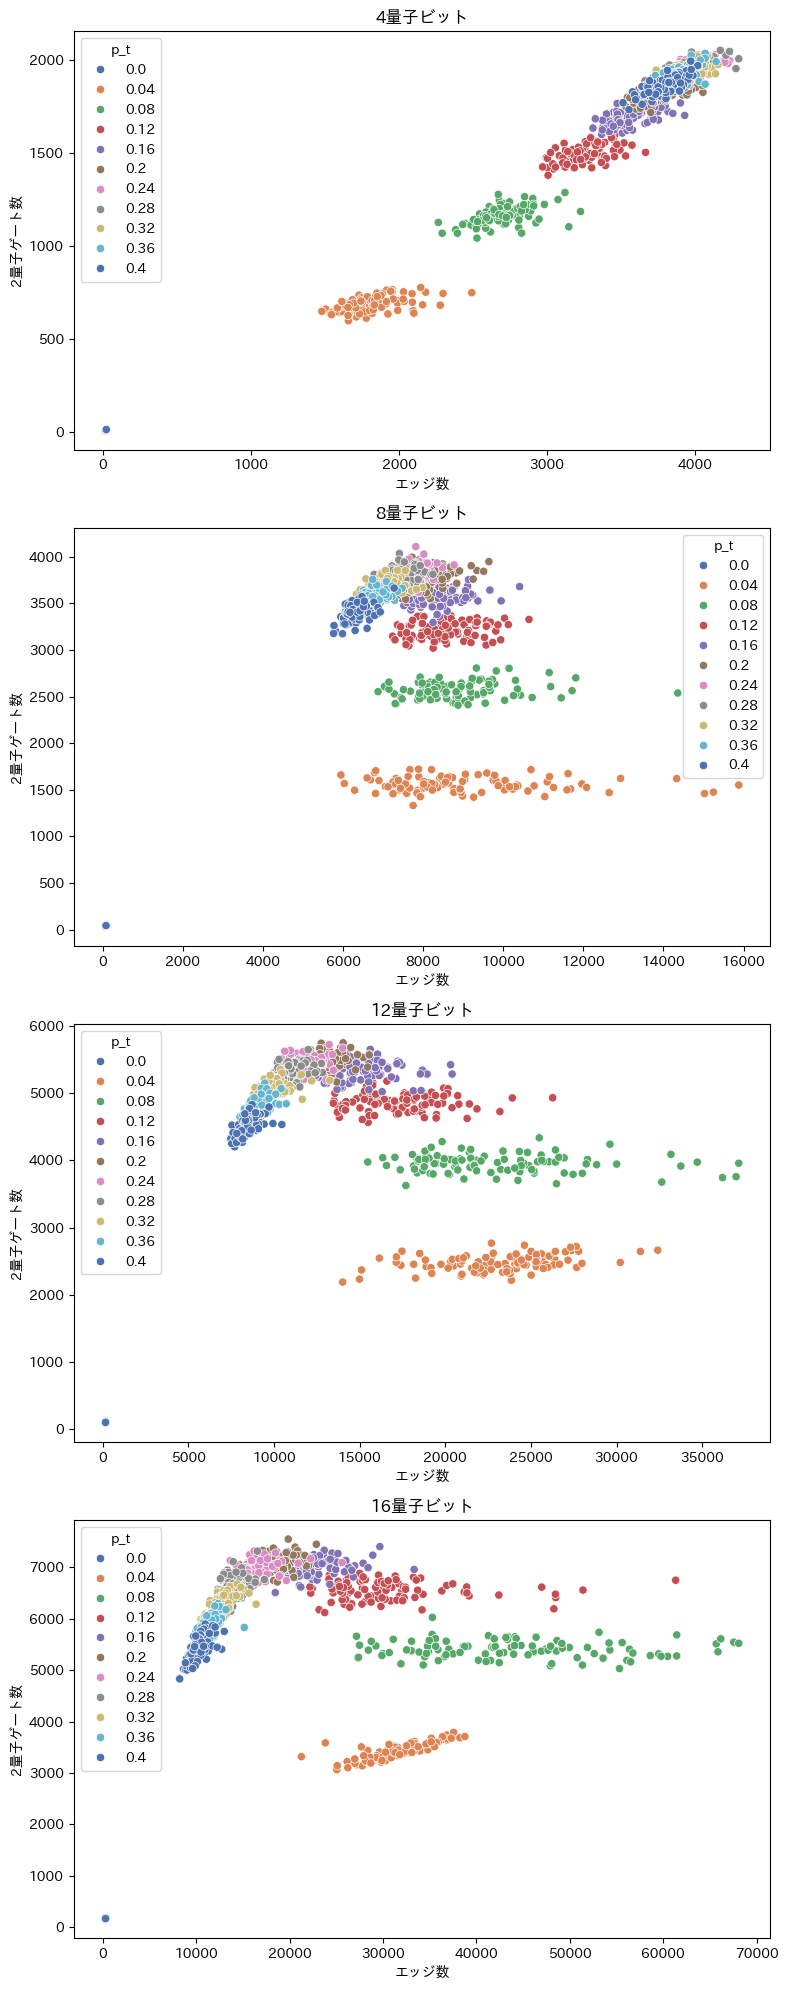

Qubit = 4, p_t = 0: 0.9522166303980073
Qubit = 4, p_t = 0.04: 0.48335947004486374
Qubit = 4, p_t = 0.08: 0.5274049722466566
Qubit = 4, p_t = 0.12: 0.5147518626247216
Qubit = 4, p_t = 0.16: 0.5872981802450208
Qubit = 4, p_t = 0.2: 0.571436856650947
Qubit = 4, p_t = 0.24: 0.6858972505504769
Qubit = 4, p_t = 0.28: 0.738766651388709
Qubit = 4, p_t = 0.32: 0.6224720322532444
Qubit = 4, p_t = 0.36: 0.7326058554313598
Qubit = 4, p_t = 0.4: 0.7638886342710972
Qubit = 8, p_t = 0: 0.8336826453548734
Qubit = 8, p_t = 0.04: -0.08994845496791941
Qubit = 8, p_t = 0.08: 0.15172418269917212
Qubit = 8, p_t = 0.12: 0.19884172109710618
Qubit = 8, p_t = 0.16: 0.15554982681947876
Qubit = 8, p_t = 0.2: 0.47945695390539705
Qubit = 8, p_t = 0.24: 0.4732302736627616
Qubit = 8, p_t = 0.28: 0.5097267515601204
Qubit = 8, p_t = 0.32: 0.3797982221364644
Qubit = 8, p_t = 0.36: 0.5490240341902283
Qubit = 8, p_t = 0.4: 0.5278977517533987
Qubit = 12, p_t = 0: 0.7543785423839683
Qubit = 12, p_t = 0.04: 0.408919462723971

In [4]:
#横軸、エッジ数　縦軸　2量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []
q_values = []  
for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]

        for index,row in data.iterrows():

            two_qubit_gates = row['two-qubit_gates']
            edge = row['edge count']

            x.append(edge)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'edge': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='edge', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"{q_value}量子ビット")
    ax.set_xlabel('エッジ数')
    ax.set_ylabel('2量子ゲート数')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['edge', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['edge', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #corr = subset[['mean', 'two_qubit_gates']].corr()
        #meanとtwo_qubitの相関係数のみを取得
        corr = subset[['edge', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['edge', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


(4444, 4)
Qubit = 4: 0.9558991226553969
Qubit = 8: -0.6513185432719367
Qubit = 12: -0.9071423597890346
Qubit = 16: -0.8312829369018511


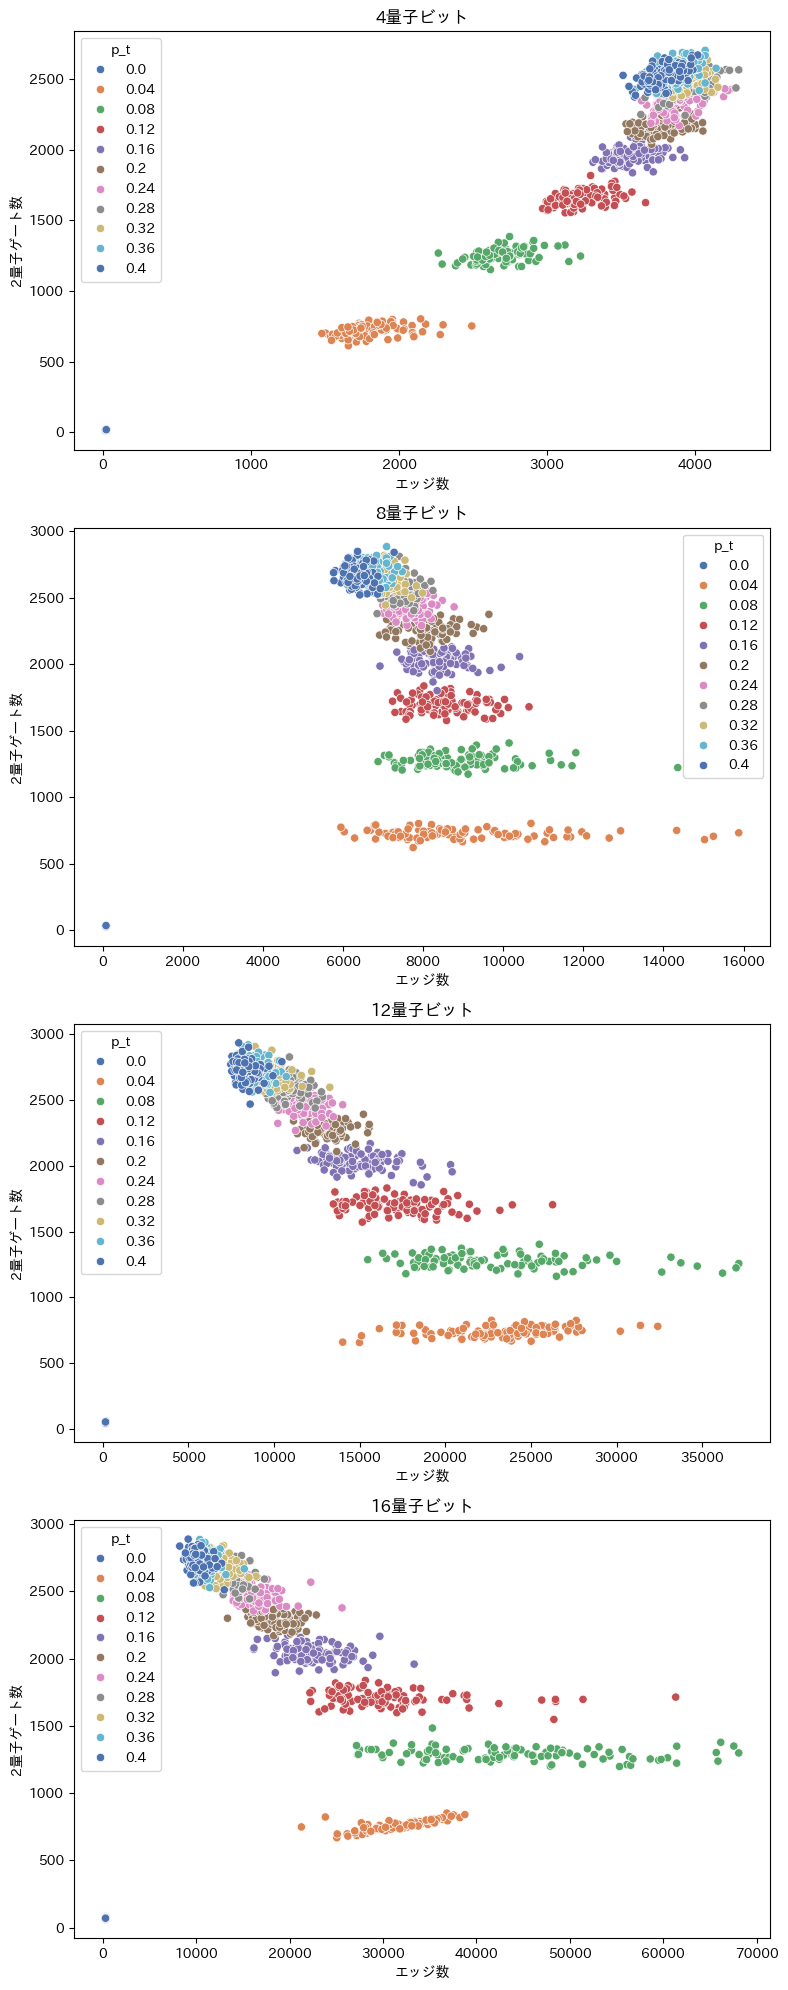

Qubit = 4, p_t = 0: 0.33943393987734277
Qubit = 4, p_t = 0.04: 0.34610602308970445
Qubit = 4, p_t = 0.08: 0.3529146487019643
Qubit = 4, p_t = 0.12: 0.3636001312258271
Qubit = 4, p_t = 0.16: 0.3474377944710802
Qubit = 4, p_t = 0.2: 0.3221063869722166
Qubit = 4, p_t = 0.24: 0.48140343099053917
Qubit = 4, p_t = 0.28: 0.5103155499419327
Qubit = 4, p_t = 0.32: 0.22144819839746727
Qubit = 4, p_t = 0.36: 0.36710942462653157
Qubit = 4, p_t = 0.4: 0.5603711804545444
Qubit = 8, p_t = 0: 0.16664521849697203
Qubit = 8, p_t = 0.04: -0.10331358987155816
Qubit = 8, p_t = 0.08: -0.018846378095702998
Qubit = 8, p_t = 0.12: -0.0789085282309226
Qubit = 8, p_t = 0.16: -0.04146555066827896
Qubit = 8, p_t = 0.2: 0.06319161765825712
Qubit = 8, p_t = 0.24: 0.08984617172766349
Qubit = 8, p_t = 0.28: -0.08426297071645722
Qubit = 8, p_t = 0.32: -0.1632197085068268
Qubit = 8, p_t = 0.36: -0.005257226166953675
Qubit = 8, p_t = 0.4: -0.03631755908034433
Qubit = 12, p_t = 0: 0.0036648366227092864
Qubit = 12, p_t = 0

In [ ]:
#横軸、エッジ数　縦軸　１量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []
q_values = []  
for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]

        for index,row in data.iterrows():

            one_qubit_gates = row['one-qubit_gates']
            edge = row['edge count']

            x.append(edge)
            y.append(one_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'edge': x,
    'one_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='edge', y='one_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"{q_value}量子ビット")
    ax.set_xlabel('エッジ数')
    ax.set_ylabel('一量子ゲート数')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['edge', 'one_qubit_gates']].corr()
    correlation_value = corr.loc['edge', 'one_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #corr = subset[['mean', 'two_qubit_gates']].corr()
        #meanとtwo_qubitの相関係数のみを取得
        corr = subset[['edge', 'one_qubit_gates']].corr()
        correlation_value = corr.loc['edge', 'one_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


/tmp/ipykernel_1632519/286529869.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  souwa += columns_after_0[i] * (2.5 + 5 * i)


(4444, 4)
Qubit = 4: -0.9248489891558603
Qubit = 8: -0.9072616852169489
Qubit = 12: -0.8657613858128147
Qubit = 16: -0.691952956110939


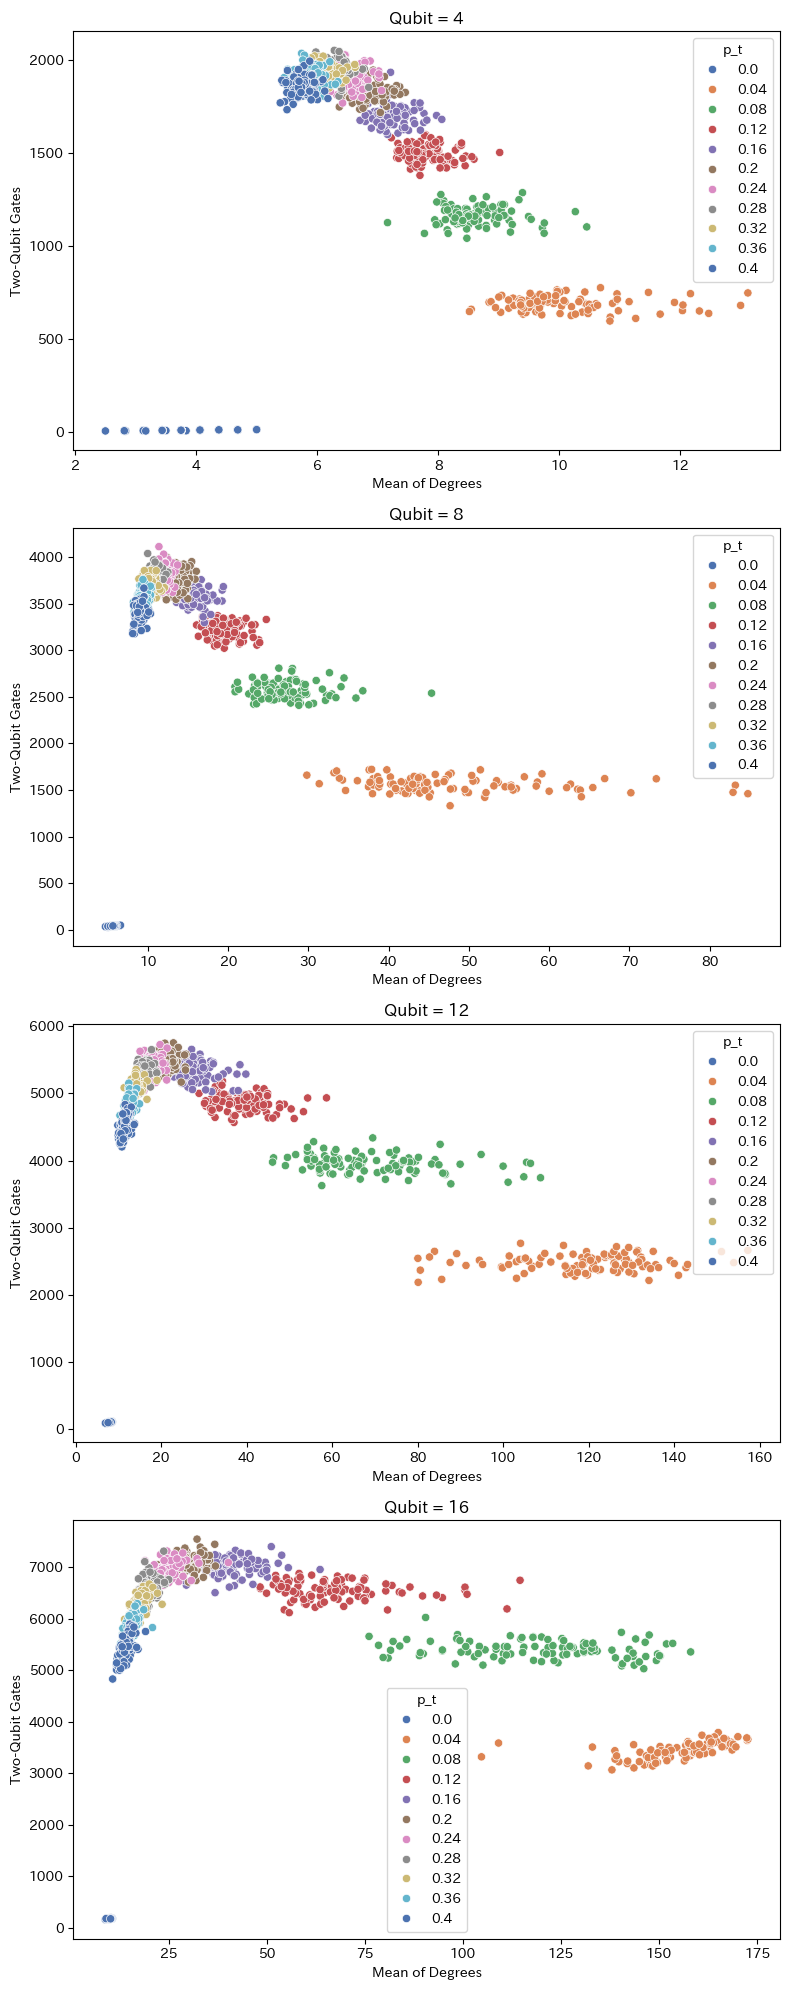

Qubit = 4, p_t = 0: 0.8543693533135189
Qubit = 4, p_t = 0.04: -0.03863155677067803
Qubit = 4, p_t = 0.08: -0.006673961527958594
Qubit = 4, p_t = 0.12: -0.09900197448822978
Qubit = 4, p_t = 0.16: -0.07159627836207019
Qubit = 4, p_t = 0.2: -0.08798242254291094
Qubit = 4, p_t = 0.24: -0.07278793057977609
Qubit = 4, p_t = 0.28: 0.022167161486273138
Qubit = 4, p_t = 0.32: 0.018053871912669026
Qubit = 4, p_t = 0.36: -0.03558337110164268
Qubit = 4, p_t = 0.4: 0.09487499150177692
Qubit = 8, p_t = 0: 0.7653663757817688
Qubit = 8, p_t = 0.04: -0.27007347856116426
Qubit = 8, p_t = 0.08: -0.09680721608449763
Qubit = 8, p_t = 0.12: -0.11336224379203037
Qubit = 8, p_t = 0.16: -0.18011900863173155
Qubit = 8, p_t = 0.2: 0.16262326660221613
Qubit = 8, p_t = 0.24: 0.062126110463625234
Qubit = 8, p_t = 0.28: 0.23163258659601463
Qubit = 8, p_t = 0.32: 0.11825031173740919
Qubit = 8, p_t = 0.36: 0.2541055490480472
Qubit = 8, p_t = 0.4: 0.3148085967054192
Qubit = 12, p_t = 0: 0.7145193618874811
Qubit = 12, p

In [3]:
#横軸 平均次数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #print(two_qubit_gates)
            #次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            #print(columns_after_0)
            #平均値
            #要素数の和
            sum = columns_after_0.sum()
            #総和
            souwa =0
            for i in range(len(columns_after_0)):
                souwa += columns_after_0[i] * (2.5 + 5 * i)

            #次数の平均値
            mean = souwa / sum

            x.append(mean)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'mean': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    #paletteをviridis以外
    sns.scatterplot(data=subset, x='mean', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('Mean of Degrees')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    corr = subset[['mean', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['mean', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

plt.tight_layout()
plt.savefig("/home/rest/forpyzx/soturon_gazou/mean_degree_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        corr = subset[['mean', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['mean', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(4444, 4)
Qubit = 4: 0.9995351719088773
Qubit = 8: 0.9993453037176988
Qubit = 12: 0.9992122413667306
Qubit = 16: 0.9991361999421072


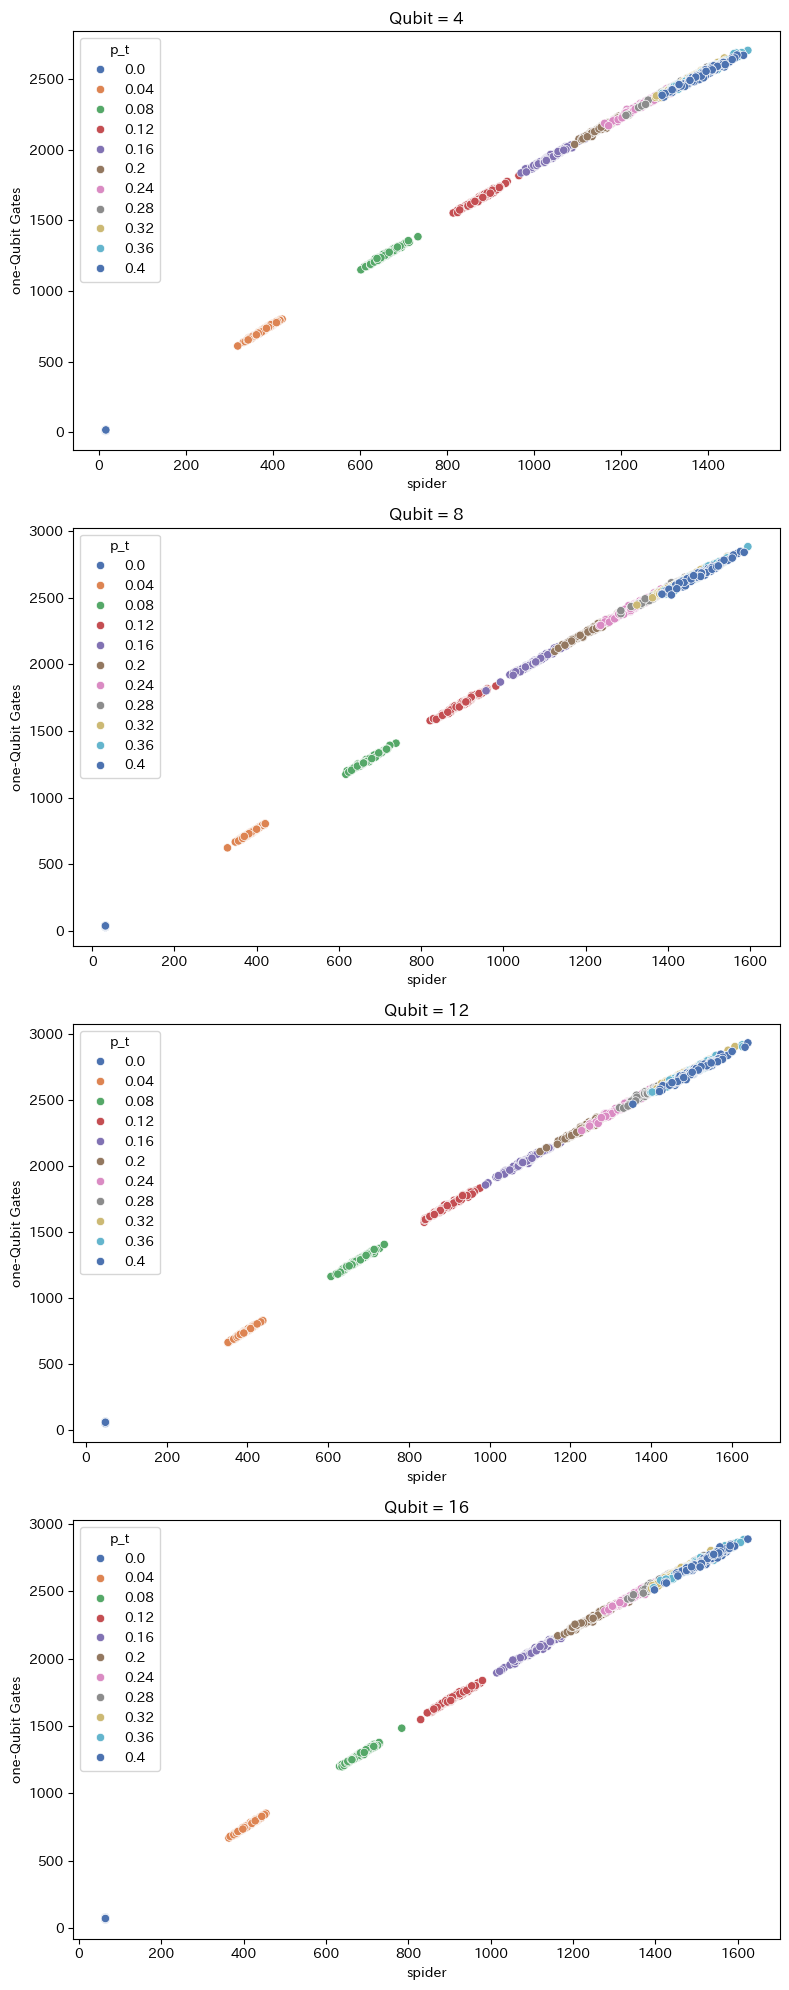

Qubit = 4, p_t = 0: 0.26667483509884626
Qubit = 4, p_t = 0.04: 0.9952237583879402
Qubit = 4, p_t = 0.08: 0.992561520733632
Qubit = 4, p_t = 0.12: 0.9906134460724186
Qubit = 4, p_t = 0.16: 0.9921237737975991
Qubit = 4, p_t = 0.2: 0.9918460311391568
Qubit = 4, p_t = 0.24: 0.9887504482200452
Qubit = 4, p_t = 0.28: 0.9924737197445591
Qubit = 4, p_t = 0.32: 0.9877249756210076
Qubit = 4, p_t = 0.36: 0.9901336836537976
Qubit = 4, p_t = 0.4: 0.9873861959891947
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9945532315271068
Qubit = 8, p_t = 0.08: 0.9933542367125235
Qubit = 8, p_t = 0.12: 0.9919192989706778
Qubit = 8, p_t = 0.16: 0.9943422436972865
Qubit = 8, p_t = 0.2: 0.9909627891185234
Qubit = 8, p_t = 0.24: 0.9901829451250613
Qubit = 8, p_t = 0.28: 0.9911183255385356
Qubit = 8, p_t = 0.32: 0.9918349742773369
Qubit = 8, p_t = 0.36: 0.9897420645668069
Qubit = 8, p_t = 0.4: 0.9878376442851202
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9955659821023115
Qubit = 12, p_t = 0.08: 0.9914763

In [5]:
#横軸 スパイダー数　縦軸1量子ゲート数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #1量子ゲート数取得
            one_qubit_gates = row['one-qubit_gates']
            #次数取得
            spider = row['spider count']
            
            x.append(spider)
            y.append(one_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'one_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='one_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('one-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'one_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'one_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/spider_one.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'one_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'one_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


(4444, 4)
Qubit = 4: 0.9711284644970639
Qubit = 8: 0.8831276115086548
Qubit = 12: 0.7392539864572472
Qubit = 16: 0.5687592537128141


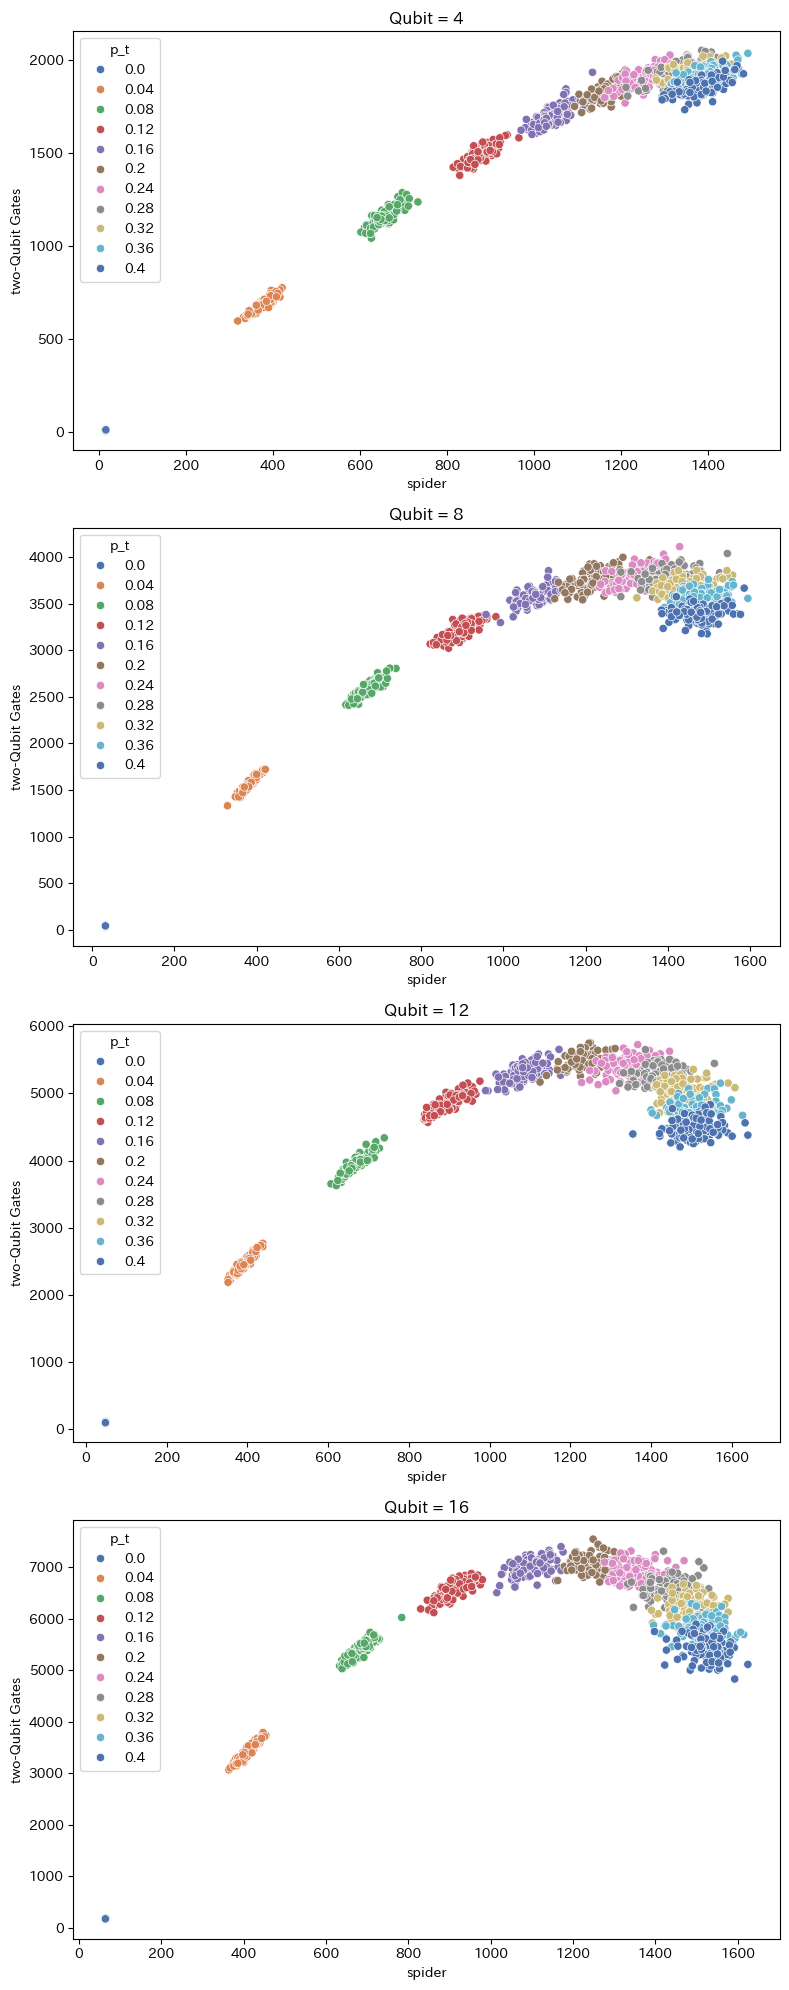

Qubit = 4, p_t = 0: 0.40945481431620556
Qubit = 4, p_t = 0.04: 0.9247385207820963
Qubit = 4, p_t = 0.08: 0.8367544975771436
Qubit = 4, p_t = 0.12: 0.8344987790702711
Qubit = 4, p_t = 0.16: 0.7598242715945178
Qubit = 4, p_t = 0.2: 0.6914186735816397
Qubit = 4, p_t = 0.24: 0.7380891300008962
Qubit = 4, p_t = 0.28: 0.6987004806065974
Qubit = 4, p_t = 0.32: 0.5539716311139048
Qubit = 4, p_t = 0.36: 0.6613407991004635
Qubit = 4, p_t = 0.4: 0.641109304131727
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9609866938055383
Qubit = 8, p_t = 0.08: 0.8873888263404669
Qubit = 8, p_t = 0.12: 0.7804278854718915
Qubit = 8, p_t = 0.16: 0.6950272140823087
Qubit = 8, p_t = 0.2: 0.6280295370514148
Qubit = 8, p_t = 0.24: 0.5995512928456581
Qubit = 8, p_t = 0.28: 0.32722163580800157
Qubit = 8, p_t = 0.32: 0.3092697692512067
Qubit = 8, p_t = 0.36: 0.3478858972942242
Qubit = 8, p_t = 0.4: 0.1598945192338505
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9554293858348071
Qubit = 12, p_t = 0.08: 0.912230

In [5]:
#横軸 スパイダー数　縦軸2量子ゲート数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            spider = row['spider count']
            
            x.append(spider)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/spider_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


(4444, 4)
Qubit = 4: 0.979726501176656
Qubit = 8: 0.9269662617149781
Qubit = 12: 0.8596066781839914
Qubit = 16: 0.7916685579409948


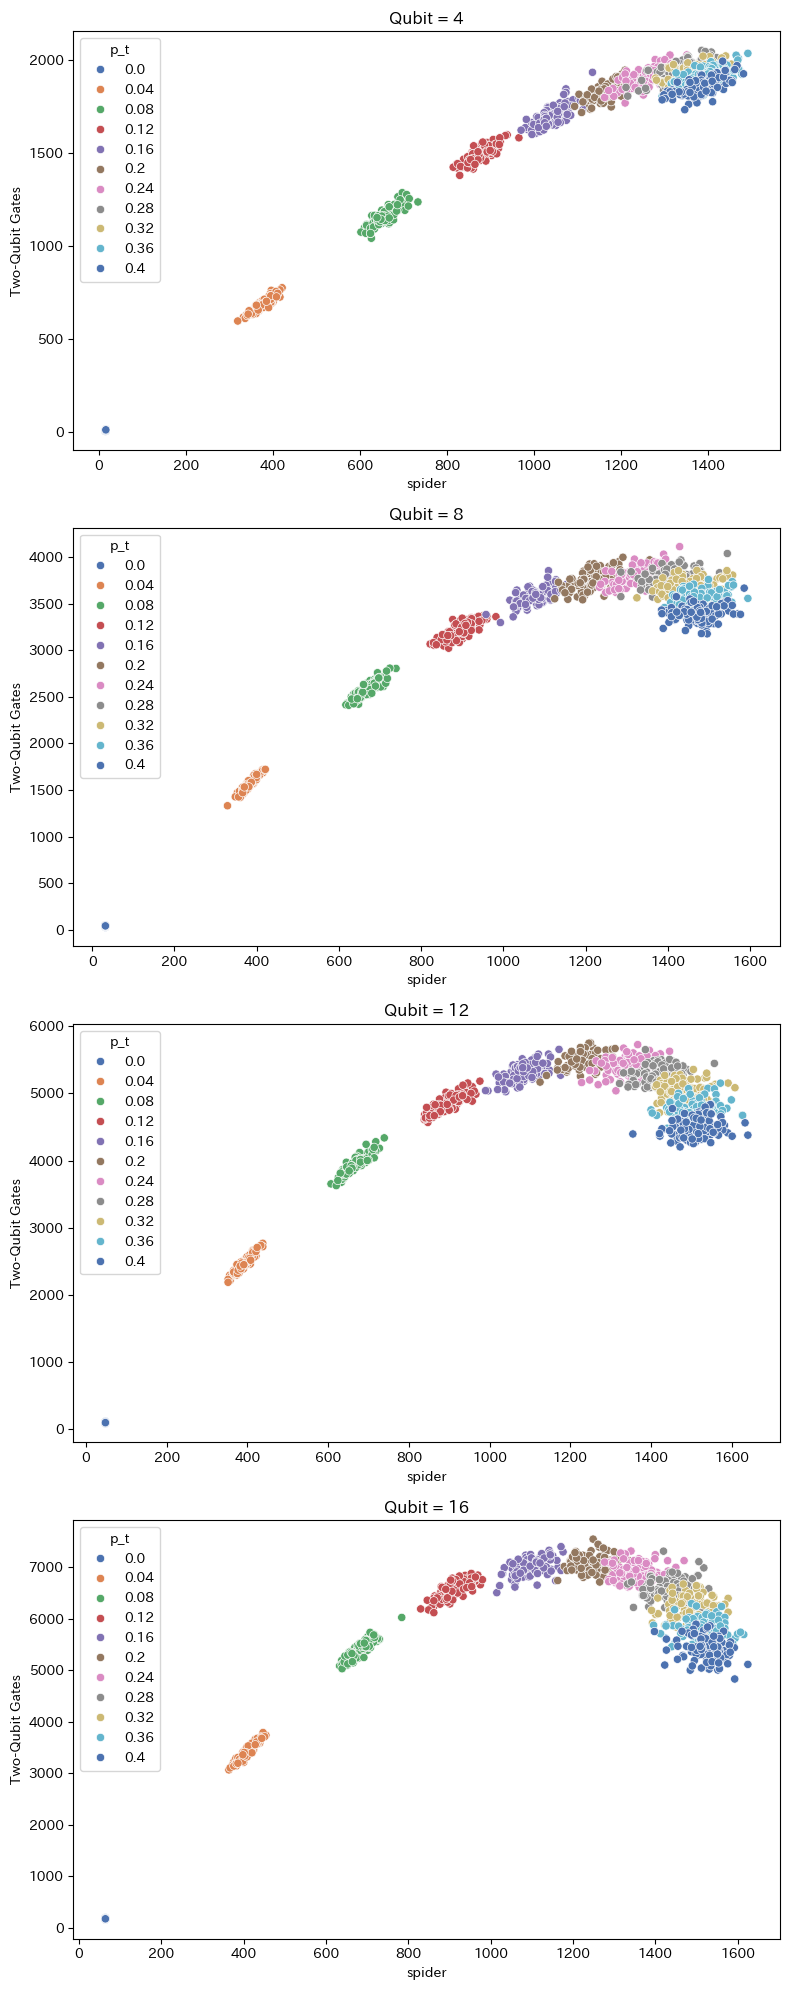

Qubit = 4, p_t = 0: 0.40945481431620556
Qubit = 4, p_t = 0.04: 0.9247385207820963
Qubit = 4, p_t = 0.08: 0.8367544975771436
Qubit = 4, p_t = 0.12: 0.8344987790702711
Qubit = 4, p_t = 0.16: 0.7598242715945178
Qubit = 4, p_t = 0.2: 0.6914186735816397
Qubit = 4, p_t = 0.24: 0.7380891300008962
Qubit = 4, p_t = 0.28: 0.6987004806065974
Qubit = 4, p_t = 0.32: 0.5539716311139048
Qubit = 4, p_t = 0.36: 0.6613407991004635
Qubit = 4, p_t = 0.4: 0.641109304131727
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9609866938055383
Qubit = 8, p_t = 0.08: 0.8873888263404669
Qubit = 8, p_t = 0.12: 0.7804278854718915
Qubit = 8, p_t = 0.16: 0.6950272140823087
Qubit = 8, p_t = 0.2: 0.6280295370514148
Qubit = 8, p_t = 0.24: 0.5995512928456581
Qubit = 8, p_t = 0.28: 0.32722163580800157
Qubit = 8, p_t = 0.32: 0.3092697692512067
Qubit = 8, p_t = 0.36: 0.3478858972942242
Qubit = 8, p_t = 0.4: 0.1598945192338505
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9554293858348071
Qubit = 12, p_t = 0.08: 0.912230

In [6]:
#横軸　スパイダー　
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.24,0.28,0.32,0.36,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            spider = row['spider count']
            x.append(spider)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) ]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/edge_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")